# 빈도 분석, Frequency Analysis
## 네이버 영화자료.

- 깃헙에서 200,000 건의 영화평 데이터를 다운로드 받을 수 있다
	- ratings.txt 파일만 받으면 된다 (pytest 폴더에 small 버전도 있음)
	- https://github.com/e9t/nsmc/

In [1]:
import matplotlib
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)

- matplotlib의 rc는 "runtime configuration"의 약자로, 그래픽의 스타일과 동작을 설정하는 데 사용되는 구성 매개변수


In [2]:
import os
import pandas as pd

path = 'D:\elice_python\GAS_5\pytest'

os.chdir(path)
os.getcwd()

'D:\\elice_python\\GAS_5\\pytest'

In [3]:
def read_data(filename:str, encoding='cp949', start=1):
    with open(filename, 'r', encoding=encoding) as f :
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[start:]  # 파일 header 제외를 위해 설정.
    return data  # 각 요소는 파일의 한 줄에 해당하며, 각 줄은 탭으로 구분된 값들로 이루어진 리스트

In [4]:
def write_data(data,filename:str,encoding='cp949'):
    with open(filename,'w',encoding=encoding) as f :
        f.write(data)

In [5]:
data = read_data('ratings_small.txt')

In [6]:
print(len(data))
print(data[:3])
print(len(data[0]))
print(data[0])

500
[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'], ['8132799', '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."', '1'], ['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1']]
3
['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']


In [7]:
print(f'첫번째 문장 : {data[0][1]}')

첫번째 문장 : 어릴때보고 지금다시봐도 재밌어요ㅋㅋ


### 문장별 어절 길이

In [8]:
len_data = []
for d in data:
    len_data.append(len(d[1].split()))

print('첫번째 문장의 어절 길이 : ', len_data[0])

첫번째 문장의 어절 길이 :  3


### 문장별 어절단위 통계분석

In [9]:
import numpy as np

print('텍스트 최대 길이: {}'.format(np.max(len_data)))
print('텍스트 최소 길이: {}'.format(np.min(len_data)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_data)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(len_data)))
print('텍스트 중간 길이: {}'.format(np.median(len_data)))
print('제 1 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 25)))
print('제 3 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 75)))

텍스트 최대 길이: 36
텍스트 최소 길이: 1
텍스트 평균 길이: 7.51
텍스트 길이 표준편차: 6.53
텍스트 중간 길이: 6.0
제 1 사분위 텍스트 길이: 3.0
제 3 사분위 텍스트 길이: 9.0


### Boxplot
- boxplot은 사분위수를 포함하여 최소값, 중앙값, 최대값을 잘 보여준다
- 사분위수란 자료를 크기순으로 나열한 자료값들을 4등분하는 수의 값
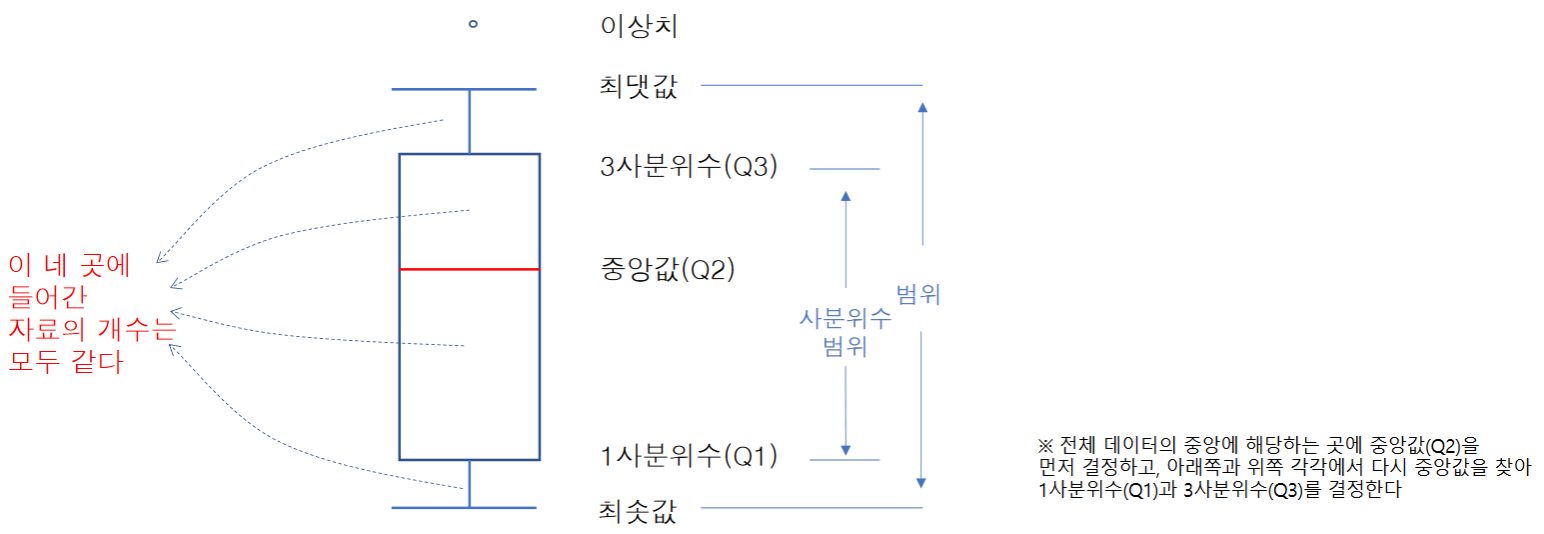

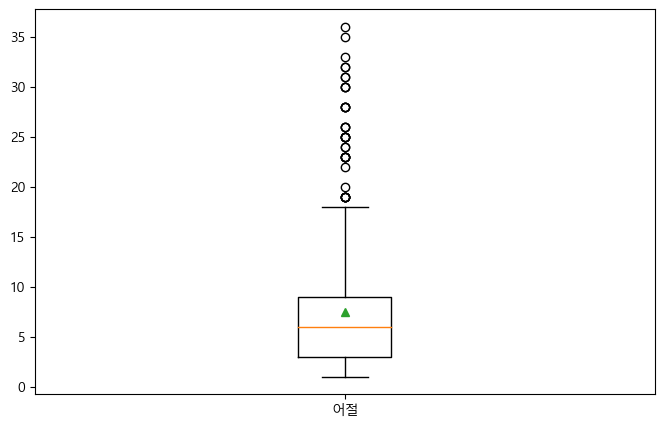

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.boxplot(len_data, labels=['어절'], showmeans=True)
plt.show()

### histogram으로 분포 확인.

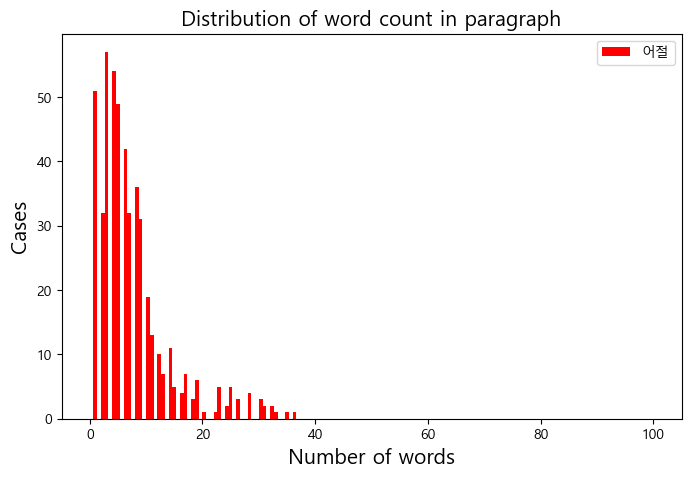

In [18]:
plt.figure(figsize=(8, 5))
plt.hist(len_data, bins=150, range=[0,100], facecolor='r', label='어절')
plt.title("Distribution of word count in paragraph", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Cases', fontsize=15)
plt.show()

In [11]:
import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages
classpath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


### 샘플 데이터 형태소 분석 연습

In [12]:
sample_data = rhinoMorph.onlyMorph_list(
rn, data[0][1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
print(sample_data)
print(' '.join(sample_data))

['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ']
어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ


### 전체 데이터 형태소 분석 및 저장

In [13]:
morphed_data = ''
for data_each in data:
    morphed_data_each = rhinoMorph.onlyMorph_list(
rn, data_each[1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
    joined_data_each = ' '.join(morphed_data_each)
    if joined_data_each:  # 내용이 있는 경우에만 저장
        morphed_data+=data_each[0]+'\t'+joined_data_each+'\t'+data_each[2]+'\n'
        
write_data(morphed_data, 'ratings_morphed.txt', encoding='cp949')

### 분석된 데이터 로딩

In [14]:
data = read_data('ratings_morphed.txt', encoding='cp949',start=0)
print(len(data))
print(len(data[0]))

495
3


In [15]:
data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]

In [19]:
len_data = []
for d in data_text:
    len_data.append(len(d.split()))
print("첫번째 문장의 형태소 길이:", len_data[0])

첫번째 문장의 형태소 길이: 8


In [21]:
print('형태소 최대 길이: {}'.format(np.max(len_data)))
print('형태소 최소 길이: {}'.format(np.min(len_data)))
print('형태소 평균 길이: {:.2f}'.format(np.mean(len_data)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(len_data)))
print('형태소 중간 길이: {}'.format(np.median(len_data)))
print('제 1 사분위 형태소 길이: {}'.format(np.percentile(len_data, 25)))
print('제 3 사분위 형태소 길이: {}'.format(np.percentile(len_data, 75)))

형태소 최대 길이: 40
형태소 최소 길이: 1
형태소 평균 길이: 8.93
형태소 길이 표준편차: 7.32
형태소 중간 길이: 7.0
제 1 사분위 형태소 길이: 4.0
제 3 사분위 형태소 길이: 11.0


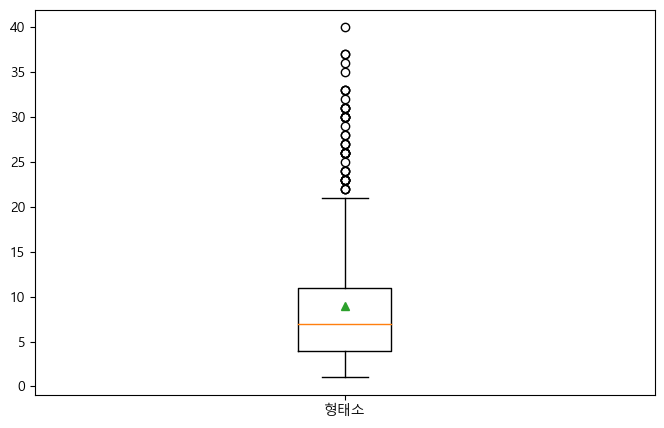

In [22]:
plt.figure(figsize=(8, 5))
plt.boxplot(len_data, labels=['형태소'], showmeans=True)
plt.show()

### histogram으로 분포 확인

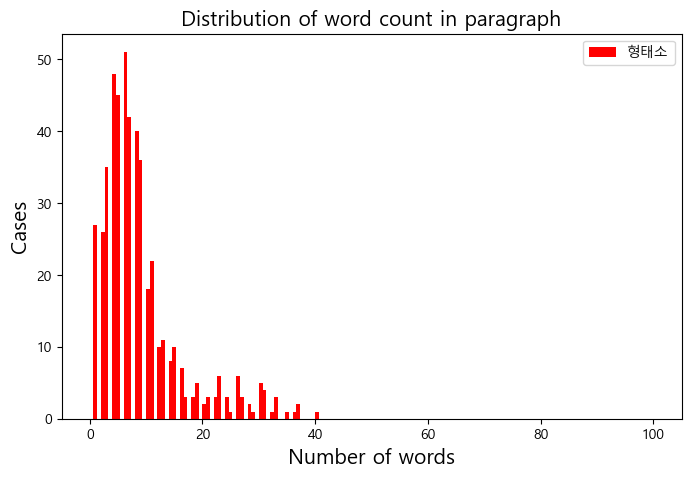

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(len_data, bins=150, range=[0,100], facecolor='r', label='형태소')
plt.title("Distribution of word count in paragraph", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Cases', fontsize=15)
plt.show()

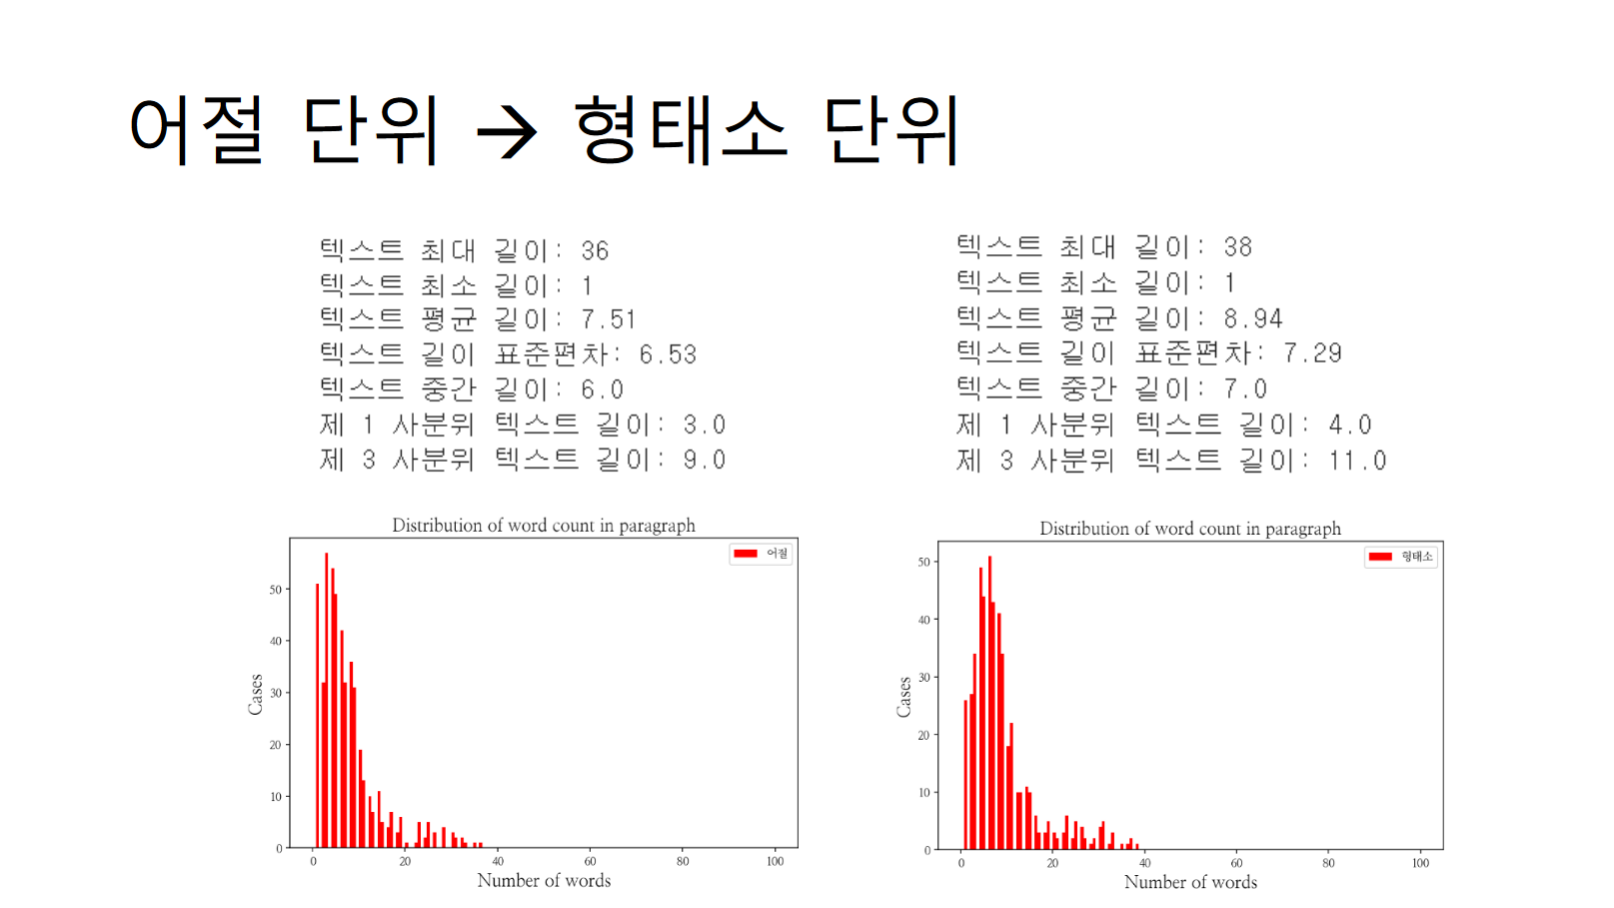

### Counter 연습

In [24]:
from collections import Counter
count = Counter(["여름", "과일", "봄", "딸기", "과일", "봄", "딸기", "봄"])
result = count.most_common(3) # 가장 빈도가 높은 어휘 3개만
print("count: ", count) # 딕셔너리
print("result: ", result) # 튜플 원소를 갖는 리스트
print("result[0]", result[0])
print("result[0][0]: ", result[0][0]) # 0 번째 요소의 0 번째
print("result[0][1]: ", result[0][1]) # 0 번째 요소의 1 번째

count:  Counter({'봄': 3, '과일': 2, '딸기': 2, '여름': 1})
result:  [('봄', 3), ('과일', 2), ('딸기', 2)]
result[0] ('봄', 3)
result[0][0]:  봄
result[0][1]:  3


### 빈도 구하기 - 단어 분리

In [25]:
data_text_freq = Counter(data_text) # 안 좋은 방법. 한 문장 단위로 나뉜 리스트를 바로 처리 시도
print('data_text:', data_text_freq) # 데이터를 바로 카운트하면 각 줄이 하나의 종류로 카운트된다

data_text: Counter({'굿': 3, '재미있다': 2, '최고': 2, '보다': 2, '어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ': 1, '디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사': 1, '폴리스스토리 시리즈 뉴 없다 최고': 1, '와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화': 1, '안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화': 1, '사랑 해보다 사람 처음 끝 웃다 있다 영화': 1, '완전 감동 다시다 감동': 1, '개들 전쟁 나오다 나오다 1빠 보다': 1, '바보 병': 1, '나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다': 1, '고질라 무 귀엽다 ㅋㅋ': 1, '영화 오페라 작품 극단적 평 갈리다 어쩌다 없다': 1, '반전 좋다 ^^': 1, '평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다': 1, '네고시에이터 소재 같다 아무런 관련 없다': 1, '단연 최고': 1, '가다 갈수록 더욱 빠지다 밀회 화이팅': 1, '어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품': 1, '오랜만 보다 제대로 되다 범죄 스릴러': 1, '그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태': 1, '마지막 씬 잊다 없다': 1, '강압적 용서 세뇌 용서 대하다 비판': 1, '중세 시대 명작 굿 평점 왜 이러하다': 1, '시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작': 1, '사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화

In [28]:
data_text[0]

'어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ'

In [35]:
merged_text = ' '.join(data_text)
print(merged_text[:30])
print(merged_text[-30:])
merged_text_list = merged_text.split(' ')  # 이러면 텍스트의 모든 요소(형태소 등)가 공백 단위로 분리된 하나의 리스트가 된다.
print(merged_text_list[:10])
print(merged_text_list[-10:])

어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ 디자인 
프 보다 그렇다 ㅋㅋ 폭풍 저그 나가다 영차 영차 영차
['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ', '디자인', '배우다']
['스머프', '보다', '그렇다', 'ㅋㅋ', '폭풍', '저그', '나가다', '영차', '영차', '영차']


### 빈도 구하기 - 불용어 제거

In [36]:
# 실질형태소 중 불용어 등록 및 제거 (국립국어원 말뭉치 중 고빈도 어휘)
stopwords_ko = ["하다", "있다", "되다", "그", "않다", "없다", "나", "말", "사람", 
                "이", "보다", "한", "때", "년", "같다", "대하다", "일", "이", "생각", 
                "위하다", "때문", "그것", "그러나", "가다", "받다", "그렇다", "알다", 
                "사회", "더", "그녀", "문제", "오다", "그리고", "크다", "속"]
merged_text_list_no_stopwords = [
    word for word in merged_text_list if not word in stopwords_ko
    ]
print('merged_text_list without stopwords:', merged_text_list_no_stopwords[:10])
print('불용어 제거 전 길이:', len(merged_text_list))
print('불용어 제거 후 길이:', len(merged_text_list_no_stopwords))
merged_text_list = merged_text_list_no_stopwords # 변수명 대체

merged_text_list without stopwords: ['어리다', '지금', '다시', '재미있다', 'ㅋㅋ', '디자인', '배우다', '학생', '외국', '디자이너']
불용어 제거 전 길이: 4420
불용어 제거 후 길이: 3827


### 빈도 구하기 - Counter

In [39]:
wordInfo = Counter(merged_text_list) # 하나의 리스트로 묶인 분리된 요소들을 카운트한다 (내림차순)
print('wordInfo:', wordInfo)

wordInfo: Counter({'영화': 175, 'ㅋㅋ': 61, '정말': 47, '너무': 47, '좋다': 43, '재미있다': 36, '진짜': 33, '연기': 30, '만들다': 28, '왜': 27, '잘': 27, '최고': 25, 'ㅋ': 25, '다': 24, '나오다': 23, '아깝다': 21, '안': 19, '감동': 18, '평점': 17, '모르다': 17, '재미': 17, '이런': 16, '드라마': 15, '다시': 14, '스토리': 14, '못': 13, 'ㅠ': 13, '한국': 13, '재미없다': 13, '^^': 12, '시간': 12, '내용': 12, '말다': 12, '주다': 12, '마음': 11, 'ㅠㅠ': 11, '감독': 11, '이쁘다': 11, '지금': 10, '명작': 10, '아': 10, '내내': 10, '웃기다': 10, 'ㅎㅎ': 10, '처음': 9, '그런': 9, '좋아하다': 9, '전': 9, 'ㅡㅡ': 9, '주인공': 9, '돈': 9, '끝': 8, '완전': 8, '굿': 8, '작품': 8, '장면': 8, '남자': 8, '액션': 8, '무슨': 8, '많다': 8, '원작': 8, '10점': 8, '최악': 8, '배우다': 7, '와': 7, '일본': 7, '많이': 7, '그냥': 7, 'ㅎ': 7, '인생': 7, '쓰레기': 7, '참': 7, '짱': 7, '잼': 7, '들다': 7, '답답': 7, '어리다': 6, '사실': 6, '지루': 6, '생각하다': 6, '공포': 6, '소재': 6, '빠지다': 6, '역시': 6, '못하다': 6, '마지막': 6, '어떻하다': 6, '또': 6, '이야기': 6, '얼굴': 6, '배우': 6, '정도': 6, '결말': 6, '별로': 6, '당시': 6, '좀': 6, '가': 6, '이것다': 6, '연출': 6, '사랑': 5, '웃다': 5, '없이': 5, '남다': 5, '

- 빈도가 구해졌으므로 이제 그래프로 표현한다.
- 그러나, 현재는 목록과 빈도를 추출하기가 조금 어렵다.
- wordInfo에 .most_common(n)을 사용하여 나온 리스트와 튜플의 결과를 for 문을 사용하여 추출해도 되나, 현재의 결과에서 sorted 함수를 이용하면 쉽게 추출할 수 있다.
- 현재의 결과는 딕셔너리와 유사한 구조이다. (Counter 객체이나, 딕셔너리 인터페이스를 갖고 있음)

### sorted 연습

In [40]:
sample = {'여름':1, '과일':2, '딸기':3} # 앞과 유사한 딕셔너리 구조
print(sorted(sample))
print(sorted(sample, reverse=True)) # 역순으로 정렬
print(sorted(sample, key=sample.get, reverse=True)) # sample.get의 출력된 값을 기준으로 sample을 정렬
print(sorted(sample.values(), reverse=True)) # 값 부분만 출력하여 정렬

['과일', '딸기', '여름']
['여름', '딸기', '과일']
['딸기', '과일', '여름']
[3, 2, 1]


- (주의) sorted 함수는 새로운 리스트 결과를 만들어내나, sort 메소드는 원 데이터를 변경한다.

In [41]:
mylist = [5, 7, 2, 3, 1]
print(sorted(mylist)) # [1, 2, 3, 5, 7]. 새로운 리스트 출력
print(mylist.sort()) # None. 결과 출력은 없다
print(mylist) # [1, 2, 3, 5, 7]. 원 데이터가 변경되었다

[1, 2, 3, 5, 7]
None
[1, 2, 3, 5, 7]


### bar 그래프 연습

In [42]:
wordInfo_sample = Counter(['여름', '과일', '과일', '딸기', '딸기', '딸기'])
sorted_keys_sample = sorted(wordInfo_sample, key=wordInfo_sample.get, reverse=True)
sorted_values_sample = sorted(wordInfo_sample.values(), reverse=True)

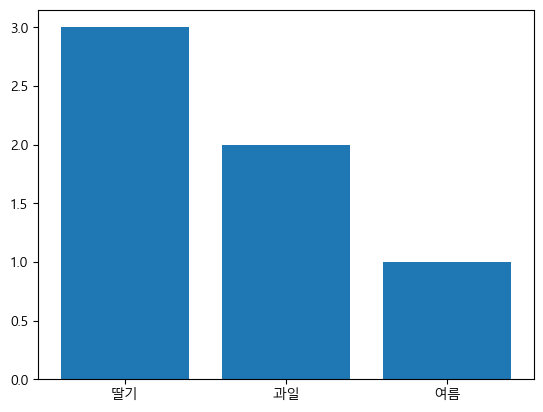

In [43]:
import matplotlib.pyplot as plt
plt.bar(sorted_keys_sample, sorted_values_sample)
plt.show()

### 그래프 그리기

In [44]:
sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)

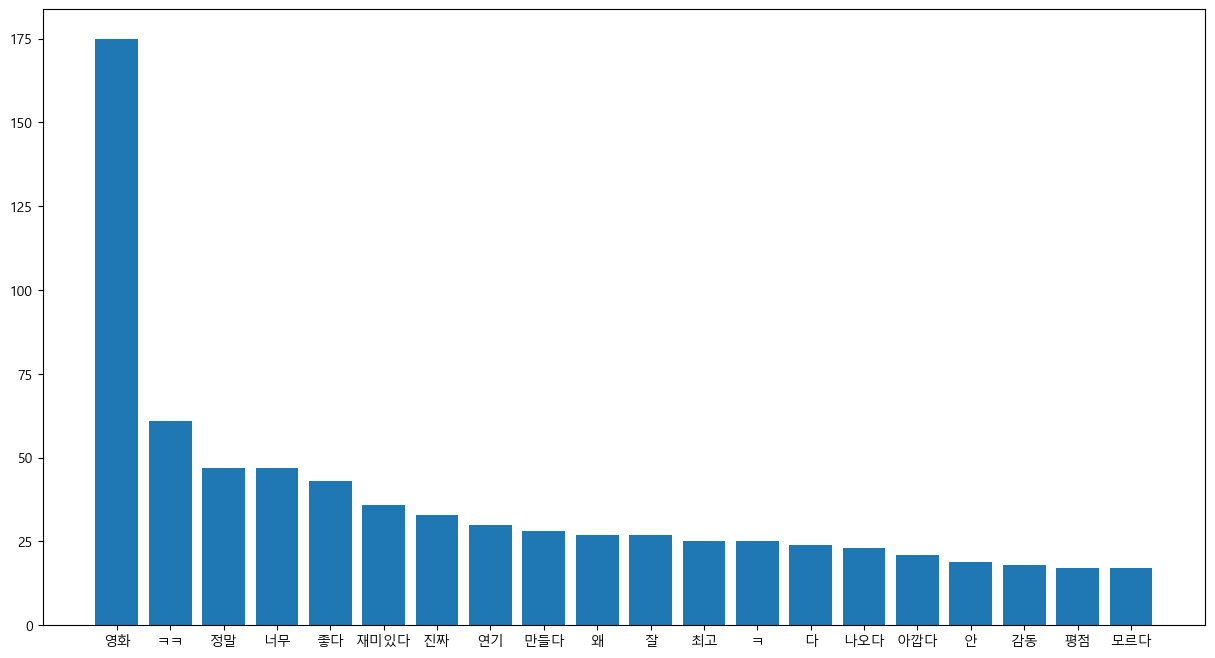

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(sorted_keys[:20], sorted_values[:20])
plt.show()

(전체 데이터는 항목이 너무 많이 상위 nn개를 사용한다.)

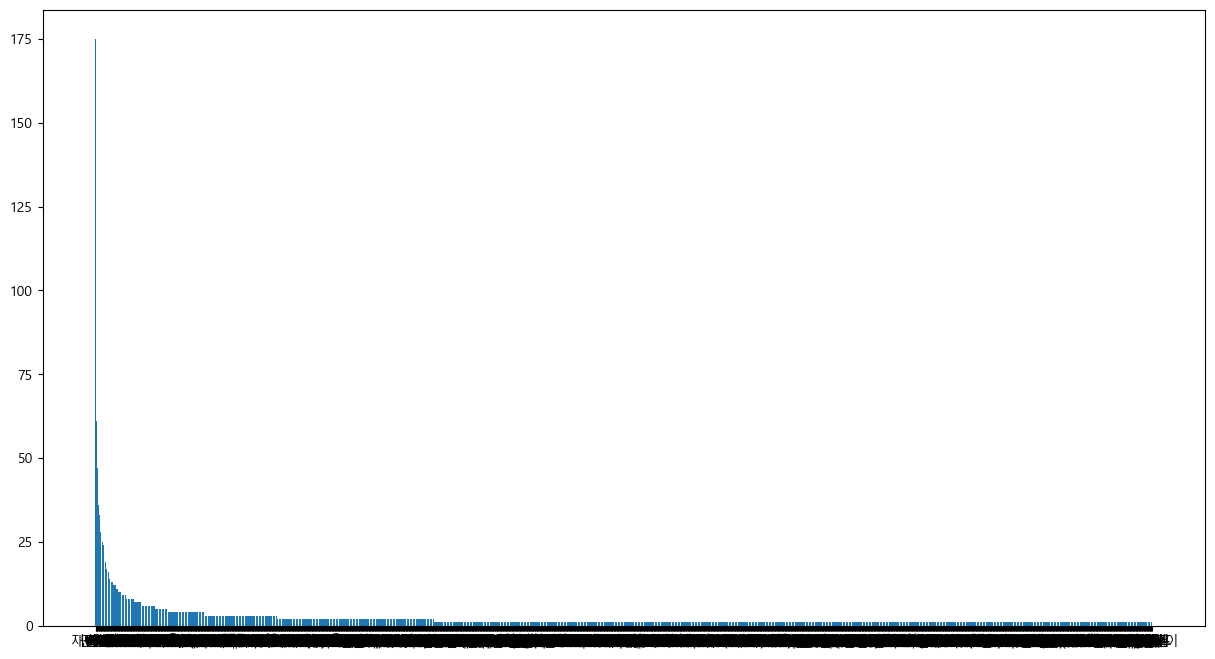

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(sorted_keys, sorted_values)
plt.show()

### Word Cloud
워드 클라우드는 자체적으로 문자열을 공백 기준으로 분리해 빈도를 센다.

In [51]:
line_data = ' '.join(merged_text_list) # 분리된 단어들을 하나의 긴 문자열로 변환
print(line_data[:40])

어리다 지금 다시 재미있다 ㅋㅋ 디자인 배우다 학생 외국 디자이너 일구다


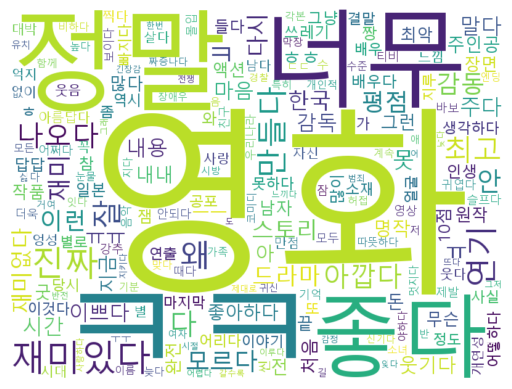

In [52]:

from wordcloud import WordCloud
cloud = WordCloud(
    font_path=font_path, 
    width=800, 
    height=600, 
    collocations=False,
    background_color='white'
    ).generate(line_data)
plt.imshow(cloud, interpolation='bilinear') # 글자를 더 부드럽게 나오게 한다
plt.axis('off') # 축의 위치 정보 off
plt.show()

#### Word Cloud with Mask

In [54]:
import numpy as np
from PIL import Image
import os
alice_mask = np.array(Image.open(os.path.join(path, "images/alice.png")))
print(alice_mask)
print(alice_mask.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(900, 900)


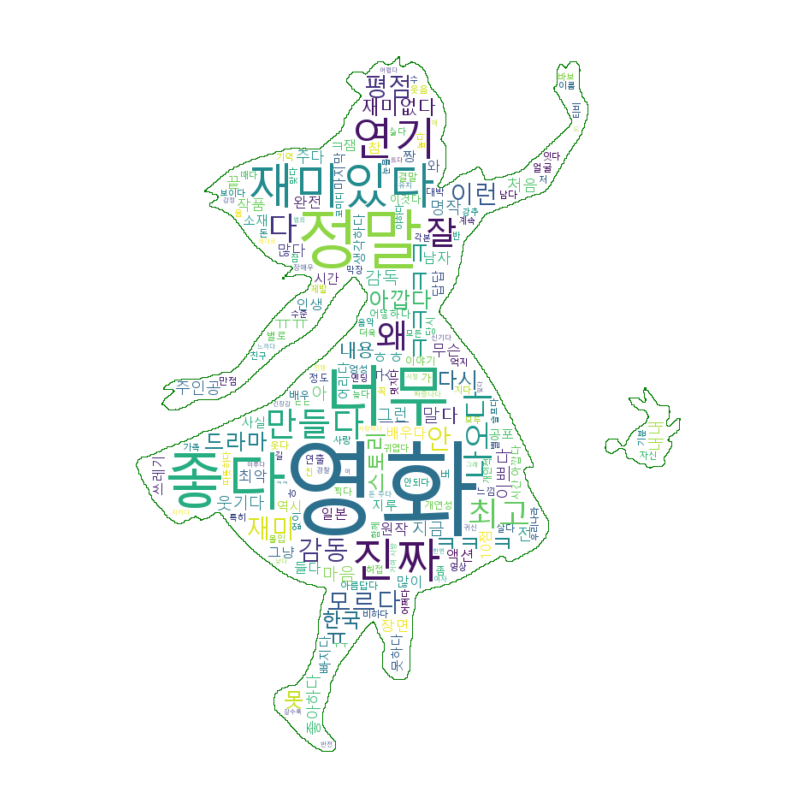

In [55]:
plt.figure(figsize=(15, 10))
cloud = WordCloud(
    font_path=font_path, 
                  width=800, 
                  height=600, 
                  background_color='white', 
                  mask=alice_mask,
                  contour_width=1, 
                  contour_color='green').generate(line_data)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off') 
plt.show()